<a href="https://www.kaggle.com/code/zwartfreak/easiest-tps-prediction-full-explanation?scriptVersionId=96426478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Hi all, this is my 2nd Kaggle notebook. Please support.**
#### 1st one can be found here -> [Easiest price prediction, full explanation](http://www.kaggle.com/zwartfreak/easiest-price-prediction-full-explanation)

##### This problem is a multiclass classification problem, which requires dense classification or neural networks involvement.
#### **Also, this dataset is very hige, we have to reduce it somehow without losing any relevant data.**
### Task: Reducing the dataset size as this is taking too much time

In [1]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading data
        
train = pd.read_csv("../input/tabular-playground-series-dec-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-dec-2021/test.csv")
sub = pd.read_csv("../input/tabular-playground-series-dec-2021/sample_submission.csv")

/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-dec-2021/train.csv
/kaggle/input/tabular-playground-series-dec-2021/test.csv


> ## Data analysis

In [2]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [3]:
train.shape, test.shape

((4000000, 56), (1000000, 55))

In [4]:
train.dtypes #, test.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

##### Wow so amused to see that there are all integer variables.

> ## Finding and treating missing values

In [5]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

#### Wow no missing value!

In [6]:
train.shape

(4000000, 56)

#### Variance

#### Correlation

> ## Data visualization

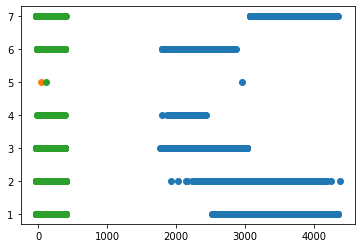

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(train['Elevation'], train['Cover_Type'])
plt.scatter(train['Slope'], train['Cover_Type'])
plt.scatter(train['Aspect'], train['Cover_Type'])
plt.show()

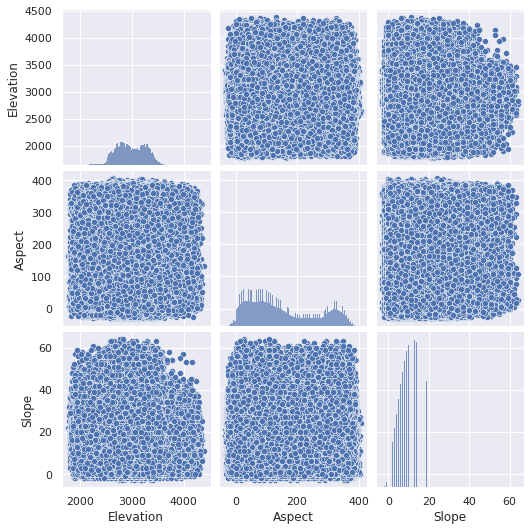

In [8]:
sns.set()
cols = ['Elevation', 'Aspect', 'Slope']
sns.pairplot(train[cols])
plt.show()

##### And wow, no missing value
##### Let's remove our dependent variable and make it y as target variable

In [9]:
X = train.drop('Cover_Type', axis=1)
y = train['Cover_Type']
X.shape, y.shape

((4000000, 55), (4000000,))

> ## train_test_split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3000000, 55), (1000000, 55), (3000000,), (1000000,))

> ## Data modelling aka ML

* XGBoost

In [11]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier()

model_xgbc.fit(x_train, y_train, verbose=1)
#model_xgbc.score(x_train, y_train), model_xgbc.score(x_test, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:41:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [12]:
y_predict_xgbc = model_xgbc.predict(test)

> ## Submission

In [13]:
result = pd.DataFrame()
result['Id'] = test['Id']
result['Cover_Type'] = y_predict_xgbc
result.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


In [14]:
result.shape

(1000000, 2)

In [15]:
result.to_csv('submission.csv', index=False)